In [146]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [3]:
inrem = pd.read_excel('inward_remit.xlsx')
inrem.sample(5)

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021e,Remittances as a share of GDP in 2021e (%)
28,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1666.960000,1684.740000,1494.740000,1665.570000,2193.590000,2408.230000,2342.370000,954.920000,600,0.770149
152,Philippines,626.000000,800.0,1049.000000,1124.000000,718.000000,806.000000,861.0,1020.000000,1262.000000,...,26716.840269,28690.797896,29799.395700,31141.973475,32809.770434,33808.967986,35167.471832,34913.342999,36240,9.395002
167,Sierra Leone,0.095256,NaN,0.080733,0.053041,0.079683,0.039261,NaN,0.076375,0.079965,...,69.660699,62.430105,48.163695,46.831554,48.340874,62.085875,52.980315,59.000000,60.298,1.368232
169,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.547486,62.167598,55.117318,60.899441,55.055866,50.961533,48.475169,35.539125,27,NaN
161,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [4]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "inflow_country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('inflow_country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances

In [5]:
inrem0.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
inflow_country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,627.710802,3.117356,6458.398367
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1600.000000,9.540847,31937.846673
Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,345.0,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1.073850,21545.679823
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Countries RECEIVING the most remittances

In [60]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1)
inrem_countries.head(5)
inrem0.sort_values('total_rem', ascending=False)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
Inflow Country,,,,,,,,,,,,,,,,,,,,,
World,35813.937460,34887.164670,36041.330782,36578.391327,35361.109730,34555.884065,40459.240711,48817.480848,52361.348036,54748.824382,...,610015.043278,602121.638664,597318.203813,640378.213555,695090.732980,722244.860532,705516.718911,751238.058819,0.000000,1.147431e+07
Low-and Middle-Income Countries,17624.196399,17847.553011,19286.015387,20848.040546,20161.127323,19346.194635,19692.453998,22543.260364,22379.180077,24363.839815,...,450419.595020,452727.113110,447484.812738,485176.048041,532353.960391,559012.409828,549419.052156,589495.322224,0.000000,8.122839e+06
India,2761.280685,2301.890115,2621.913836,2662.479622,2293.065837,2472.285487,2243.013880,2663.469748,2316.724191,2609.857302,...,70388.642797,68909.693353,62744.364090,68967.175500,78790.170929,83332.078002,83149.172934,87000.000000,2.953096,1.216372e+06
China,0.000000,0.000000,616.000000,542.000000,403.000000,271.000000,407.000000,166.000000,129.000000,76.000000,...,62332.342308,63937.646592,60999.999488,63875.674112,67413.592064,68398.475114,59506.673349,53000.000000,0.314298,9.366408e+05
Mexico,1039.000000,1220.000000,1226.000000,1391.000000,1564.000000,1619.000000,1771.000000,1987.000000,2442.000000,2790.000000,...,24802.081325,26233.171803,28690.957406,32270.507679,35768.416627,39021.789685,42878.274907,52742.962524,4.102857,6.268239e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Korea, Dem. Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Monaco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Cuba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00


### Top 10 Remittance Receiving Countries

Top 10 Receiving Countries are: Index(['India', 'China', 'Mexico', 'Philippines', 'France', 'Egypt, Arab Rep.',
       'Nigeria', 'Germany', 'Pakistan', 'Bangladesh'],
      dtype='object', name='Inflow Country')


<AxesSubplot:title={'center':'Countries Receiving the Most Remit. Overall'}, xlabel='Inflow Country', ylabel='Total Remittances (1e12)'>

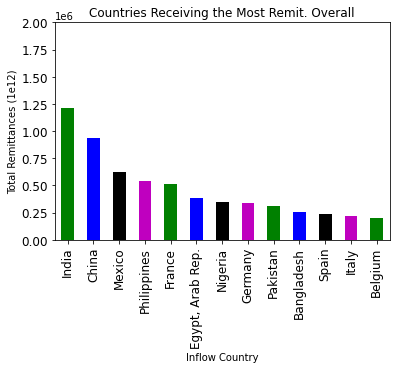

In [105]:
print('Top 10 Receiving Countries are:', (inrem_countries.index[:10]))
inrem0.index.name = 'Inflow Country'
plt.axes(title='Countries Receiving the Most Remit. Overall', xlabel=inrem0.index.name, ylabel='Total Remittances (1e12)', ylim=(0,2000000))

inrem0.sort_values('total_rem', ascending=False).total_rem[2:15].plot(kind='bar', color=['g','b','k','m'], fontsize=12)

### Top Remittance Receivers (1-5, 6-10, 11-15)

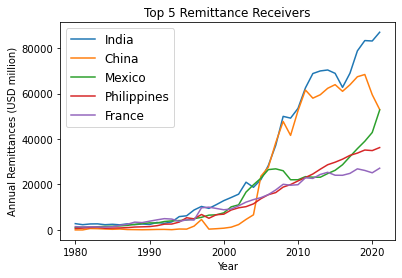

In [102]:
plt.axes(title='Top 5 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

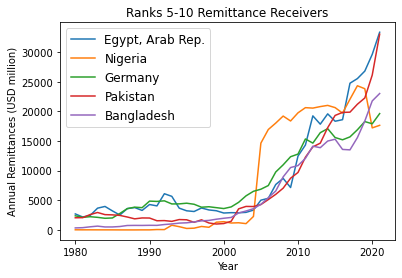

In [101]:
plt.axes(title='Ranks 5-10 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5,10):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

In [25]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')
plt.close()    # close fig

### Top 20 Remittance Receivers

In [29]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')
plt.close()    # close fig

In [32]:
inrem1 = inrem0.sort_values('total_rem', ascending=False)
inrem1 = inrem1[2:]
inrem1['total_rem'].plot(x='inflow_country', y='total_rem', kind='bar')
plt.close()    # close fig

# Percent of GDP from Remittances (top 10)

In [84]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.sort_values('remit_gdp', ascending=False).head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem,pct_gdp
inflow_country,,,,,,,,,,,,,,,,,,,,,
Tonga,0.00,0.00,8.119320,16.475310,13.463839,21.871344,20.869981,22.388044,16.612133,14.867724,...,129.278119,126.233535,158.602601,183.435146,190.366330,190.551243,220.063108,43.924772,2622.657828,0.439248
South Sudan,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1138.720000,1083.000000,633.830000,1267.160000,700.000000,1200.000000,1236.000000,37.879252,7298.589252,0.378793
Lebanon,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7480.817047,7605.729645,7061.853364,6977.962174,7409.908589,6633.293860,6612.700000,34.789036,128550.685419,0.347890
"Gambia, The",0.00,0.00,0.187813,0.701136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,135.963871,207.369236,228.181209,203.603173,275.477908,416.400000,689.200000,33.751224,3190.014917,0.337512
Somalia,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1482.000000,1577.000000,1735.000000,1735.000000,31.987463,6560.987463,0.319875
Kyrgyz Republic,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1687.701982,1994.607958,2485.778060,2688.570122,2410.507185,2422.824642,2450.000000,30.061350,29691.732227,0.300613
Tajikistan,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2258.643220,1867.398638,2237.179088,2183.340531,2321.884645,2186.807504,2250.000000,27.764067,37753.891106,0.277641
Honduras,1.60,1.75,1.500000,1.800000,1.950000,2.100000,2.100000,33.700000,41.800000,48.600000,...,3666.201327,3863.739159,4322.761614,4776.545983,5401.465665,5588.646521,7000.000000,26.590693,67031.197416,0.265907
El Salvador,49.04,72.48,112.200000,115.440000,158.920000,156.960000,157.733963,186.240000,210.360000,237.680000,...,4274.620676,4561.580071,4996.353545,5391.738702,5661.160275,5936.157615,7262.050000,26.249955,95801.342102,0.262500


<AxesSubplot:title={'center':'Percent of GDP from Remittances (Top 10)'}, xlabel='Inflow Country', ylabel='% GDP from Remittances (2021e)'>

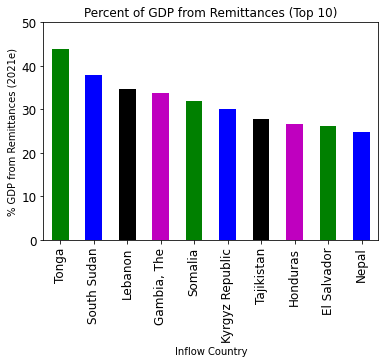

In [107]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.remit_gdp.head(10).plot(kind='bar', color=['g','b','k','m'], title='Percent of GDP from Remittances (Top 10)', xlabel='Inflow Country', ylabel='% GDP from Remittances (2021e)', ylim=(0,50), fontsize=12)

In [475]:
foo = inrem0.sort_values('remit_gdp', ascending=False).head(10)
foo = pd.DataFrame(foo.loc[:,'remit_gdp'])
foo = foo.reset_index()    # creating clean x and y columns
foo

,inflow_country,remit_gdp
0,Tonga,43.924772
1,South Sudan,37.879252
2,Lebanon,34.789036
3,"Gambia, The",33.751224
4,Somalia,31.987463
5,Kyrgyz Republic,30.061350
6,Tajikistan,27.764067
7,Honduras,26.590693
8,El Salvador,26.249955
9,Nepal,24.806654


In [477]:
foo.plot(x='inflow_country', y='remit_gdp', kind='area')
plt.close()    # close fig

### Top 20 Countries with Remittance as GDP

In [106]:
inrem1.sort_values('remit_gdp', ascending=False).remit_gdp[:20].plot(kind='bar', color=['g','b','k','m'])
plt.close()    # close fig

# OUTWARD REMITTANCES (sending, outgoing)

In [147]:
outrem = pd.read_excel('outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all')
outrem0 = outrem.replace(np.nan, 0)
outrem0['total_rem'] = outrem0.sum(axis=1)
outrem0.sample(5)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_50745/158692972.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


,Outward remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
98,Kazakhstan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3432.439705,3386.493735,3457.352394,3181.475768,2396.148204,2690.697275,2680.081028,2660.169694,2080.834887,52674.629616
50,Cyprus,9.063829,7.355894,7.783151,6.645896,5.608564,6.203552,6.947888,7.275047,10.929458,...,759.751776,742.261795,790.206517,634.530437,689.854494,776.521993,869.951115,840.805788,827.371032,12150.585887
172,Solomon Islands,0.000000,0.000000,6.693410,3.482627,3.218930,3.174031,4.249210,3.644003,5.714240,...,46.602803,44.826769,45.891323,55.643036,69.187219,54.704347,62.632140,83.345358,65.712684,843.814554
213,Zimbabwe,134.977966,122.065969,110.725779,83.272197,62.716940,15.254607,20.079194,16.780282,15.489000,...,9.889461,10.354266,10.840916,11.350439,13.844871,18.575000,29.278892,13.480566,21.707094,815.879615
152,Philippines,12.000000,11.000000,9.000000,8.000000,1.000000,1.000000,6.000000,3.000000,10.000000,...,152.357507,210.262023,182.981952,153.322155,196.072884,246.211590,258.523556,225.723158,211.194462,3069.913462


# Countries SENDING the most remittances

In [148]:
send_countries = outrem0.rename(columns={'Outward remittance flows (US$ million)': 'outflow_country'})
send_countries.outflow_country.iloc[0]    # missing replace Nan label with 'World' code
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]
send_countries.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
outflow_country,,,,,,,,,,,,,,,,,,,,,
United States,1360.0,4720.0,5140.0,5450.0,5990.0,6330.0,8660.0,8810.0,9010.0,10220.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06
Saudi Arabia,4090.0,5350.0,5350.0,5240.0,5280.0,5200.0,4800.0,4930.0,6500.0,8530.0,...,29492.573333,34984.186667,36924.240000,38787.368000,37843.205333,36118.961653,33881.511795,31197.048533,34595.847461,7.422887e+05
Switzerland,2343.0,2330.0,2759.0,2688.0,2475.0,2509.0,3780.0,5040.0,5760.0,6110.0,...,23738.994076,25337.903098,26816.952603,26031.157291,26050.038249,26936.091305,27721.355447,28390.490905,29403.688397,5.132056e+05
Germany,5826.0,4794.0,4481.0,4291.0,4042.0,3601.0,4632.0,5534.0,5872.0,5485.0,...,15581.428609,19976.705775,20084.390152,18248.805576,19348.107340,21699.115805,24351.171161,23935.924317,22024.495026,4.792461e+05
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14398.000000,17933.000000,19280.000000,40701.974132,43774.812798,44752.620830,46084.955752,44976.174268,43240.299523,4.075957e+05
Russian Federation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31647.700000,37216.680000,32640.360000,19688.840000,16244.420000,20610.140000,22308.420000,22217.240000,16872.180000,3.846105e+05
France,5070.0,4670.0,4340.0,4110.0,3840.0,4170.0,5150.0,5760.0,6393.0,5571.0,...,12561.160243,13424.774110,13729.849894,12791.549841,13284.455662,13798.960223,15022.558190,15059.012742,14632.716778,3.440113e+05
Kuwait,692.0,689.0,875.0,865.0,963.0,1040.0,1080.0,1100.0,1180.0,1280.0,...,15459.199374,17711.480681,18128.476350,15202.536401,15287.570250,13760.108803,14346.861711,18855.161641,17357.178323,2.404433e+05
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1624.0,1735.0,...,10077.435197,10528.125662,11571.027572,10705.712114,10190.899107,9801.235337,10410.041124,10360.300797,9382.380085,2.236567e+05


### Top 10 Remittance Sending Countries

<AxesSubplot:xlabel='Sending Country', ylabel='Total Remittances (USD 1e12)'>

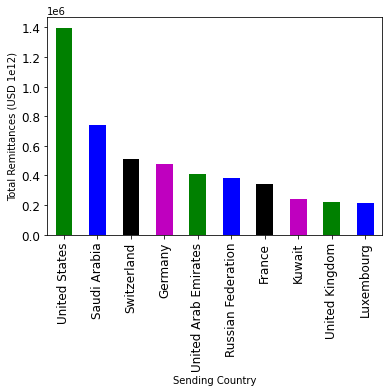

In [129]:
send_countries.total_rem.head(10).plot(kind='bar', color=['g','b','k','m'], fontsize=12, xlabel='Sending Country', ylabel='Total Remittances (USD 1e12)')

In [145]:
type(send_countries.total_rem)

pandas.core.series.Series

### Top SENDERS (1-5), (6-10), (11-15)

In [161]:
type(send_countries.total_rem.iloc[1])
send_countries

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
outflow_country,,,,,,,,,,,,,,,,,,,,,
United States,1360.0,4720.0,5140.0,5450.0,5990.0,6330.0,8660.0,8810.0,9010.0,10220.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06
Saudi Arabia,4090.0,5350.0,5350.0,5240.0,5280.0,5200.0,4800.0,4930.0,6500.0,8530.0,...,29492.573333,34984.186667,36924.240000,38787.368000,37843.205333,36118.961653,33881.511795,31197.048533,34595.847461,7.422887e+05
Switzerland,2343.0,2330.0,2759.0,2688.0,2475.0,2509.0,3780.0,5040.0,5760.0,6110.0,...,23738.994076,25337.903098,26816.952603,26031.157291,26050.038249,26936.091305,27721.355447,28390.490905,29403.688397,5.132056e+05
Germany,5826.0,4794.0,4481.0,4291.0,4042.0,3601.0,4632.0,5534.0,5872.0,5485.0,...,15581.428609,19976.705775,20084.390152,18248.805576,19348.107340,21699.115805,24351.171161,23935.924317,22024.495026,4.792461e+05
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14398.000000,17933.000000,19280.000000,40701.974132,43774.812798,44752.620830,46084.955752,44976.174268,43240.299523,4.075957e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Iran, Islamic Rep.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
St. Martin (French part),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Isle of Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [171]:
send_countries.iloc[1]

1980           4090.000000
1981           5350.000000
1982           5350.000000
1983           5240.000000
1984           5280.000000
1985           5200.000000
1986           4800.000000
1987           4930.000000
1988           6500.000000
1989           8530.000000
1990          11200.000000
1991          13700.000000
1992          13400.000000
1993          15700.000000
1994          18100.000000
1995          16600.000000
1996          15500.000000
1997          15000.000000
1998          14900.000000
1999          14000.000000
2000          15390.133333
2001          15119.733333
2002          15853.600000
2003          14783.280000
2004          13555.066667
2005          14303.400000
2006          15942.858667
2007          16435.845333
2008          21696.160000
2009          26469.733333
2010          27069.005333
2011          28474.925333
2012          29492.573333
2013          34984.186667
2014          36924.240000
2015          38787.368000
2016          37843.205333
2

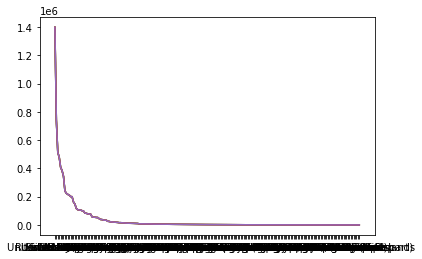

In [170]:
for i in range(5):
    plt.plot(send_countries.index, send_countries.total_rem)
    send_countries.iloc[i]

In [ ]:
for i in range(5):
    send_countries.total_rem[i].plot()
    plt.axes(title='Top 5 Remittance Senders', xlabel='Year', ylabel='Annual Remittances Sent(USD million)')
    plt.legend(loc='best', fontsize=12)
    plt.set(title='Top 5 Senders') 

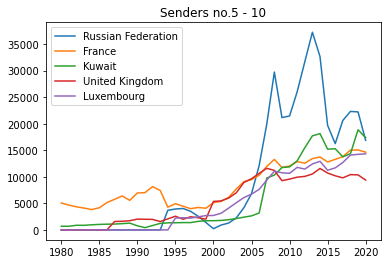

In [248]:
for i in range(5,10):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.5 - 10')

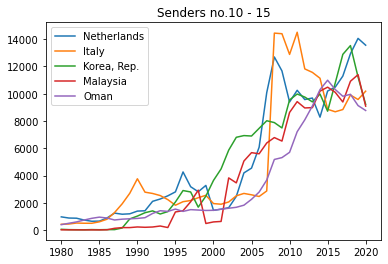

In [249]:
for i in range(10,15):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.10 - 15')

In [12]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

In [480]:
plt.close('all')

In [119]:
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries